In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**ESTUDO DA MICROCEFALIA**

existe correlação com zika ou outra doença?

**VIOLÊNCIA DE GÊNERO**



**1.   Quais são os grupos que mais sofrem com a violência?**

R. As mulheres

**2.   Os registros são todos feitos corretamentes? Existe o registro do agressor? Principalmente com os indígenas**

R. Não, falta o preenchimento de muitos dados e a classificação correta do CIE-10

**3. Será que existe correlação entre os casos de violencia sexual na amazônia e algum tipo de pedofilia ou exploração de menor?**





# IMPORTS AND LOAD FILES

In [ ]:
#@title IMPORTS
# configurações de diretórios
import os

# manipulação e operação dos dados
import numpy as np
import pandas as pd
import glob

# visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

In [ ]:
#@title LOAD FILES AND PRE-PROCESSING
#configurações adicionais de visualização dos dados
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

PATH_ROOT = '/content/drive/MyDrive/Colab Notebooks/dataflowproject'#@param {type:'string'}
DIR_2018 = 'Equador datasets 2018' #@param {type:'string'}
DIR_2019 = 'Equador datasets 2019'#@param {type:'string'}
DIR_2020 = 'Equador datasets 2020'#@param {type:'string'}
#@markdown dataframe names: df_2018, df_2019, df_2020

BASE_ROOT = os.path.join(os.path.abspath(PATH_ROOT)) 


DATA_DIR_2018 = os.path.join( BASE_ROOT, 'Equador datasets 2018') # diretório dos dados 2018
DATA_DIR_2019 = os.path.join( BASE_ROOT,DIR_2019 ) # diretório dos dados 2019
DATA_DIR_2020 = os.path.join( BASE_ROOT,DIR_2020) # diretório dos dados 2020

filenames = glob.glob(f'{DATA_DIR_2018}/*.xlsx')
files_2018 = []
count_files = 0
for filename in filenames:
    if count_files ==0:
        files_2018.append(pd.read_excel(filename)) 
        count_files += 1
    else:
        files_2018.append(pd.read_excel(filename))
        count_files +=1
load_data_2018 = True #@param {type: 'boolean'}
load_data_2019 = True #@param {type: 'boolean'}
load_data_2020 = True #@param {type: 'boolean'}

df_2018 = pd.concat(files_2018, ignore_index=True)
df_2019 = pd.read_excel(f'{DATA_DIR_2019}/0 PRAS ENERO A NOVIEMBRE 2019.xlsx')
df_2020 = pd.read_excel(f'{DATA_DIR_2020}/PRAS Y RDACAA 2020.xlsx')

In [ ]:
#@title Informa alguns detalhes dos dados como nome da coluna, tipo, quantidade e percentual de valores nulos
exploration = pd.DataFrame({
    'column': df_2020.columns, 'type': df_2020.dtypes, 'NA #': df_2020.isna().sum(), 'NA %': (df_2020.isna().sum() / df_2020.shape[0]) * 100
})

# filtra apenas os registros com valores faltantes por ordenação decrescente pela porcentagem de valores nulos
exploration[exploration['NA %'] > 0].sort_values(by='NA %', ascending=False)[:100]

,column,type,NA #,NA %
SIVANVAC_ROT_2DA_DOS,SIVANVAC_ROT_2DA_DOS,object,81977,98.974960
ATEMED_SEG_PCTE,ATEMED_SEG_PCTE,object,81977,98.974960
SIVANVAC_ROT_1RA_DOS,SIVANVAC_ROT_1RA_DOS,object,81977,98.974960
SIVANVAC_NEU_3RA_DOS,SIVANVAC_NEU_3RA_DOS,object,81977,98.974960
SIVANVAC_NEU_2DA_DOS,SIVANVAC_NEU_2DA_DOS,object,81977,98.974960
SIVANVAC_NEU_1RA_DOS,SIVANVAC_NEU_1RA_DOS,object,81977,98.974960
DOEL_VIH,DOEL_VIH,object,81969,98.965301
SIVANVAC_DLU24H_CON_ASSS_6A8,SIVANVAC_DLU24H_CON_ASSS_6A8,object,81404,98.283148
SEMANAS,SEMANAS,object,81117,97.936638
SIVANVAC_DLU24H_RLM_0A5,SIVANVAC_DLU24H_RLM_0A5,object,80703,97.436795


In [ ]:
#@title Data Filter
def maltratos (data, GRP_PRI='Trabajador/A Sexual'):
  data1 = data.loc[data['PCTE_GRP_PRI'] == GRP_PRI]
  data2 = data.loc[data['PCTE_GRP_PRI'] == GRP_PRI]
  data3 = data.loc[data['PCTE_GRP_PRI'] == GRP_PRI]
  data4 = data.loc[data['PCTE_GRP_PRI'] == GRP_PRI]
  data5 = data.loc[data['PCTE_GRP_PRI'] == GRP_PRI]
  data6 = data.loc[data['PCTE_GRP_PRI'] == GRP_PRI]
  data7 = data.loc[data['PCTE_GRP_PRI'] == GRP_PRI]
  data8 = data.loc[data['PCTE_GRP_PRI'] == GRP_PRI]
  data9 = data.loc[data['PCTE_GRP_PRI'] == GRP_PRI]
  data_geral = data1.append(data2).append(data3).append(data4).append(data5).append(data6).append(data7).append(data8).append(data9)
  df_data = data_geral[['PROF_SEXO','PCTE_NOMBRES','PCTE_SEXO',
 'PCTE_ORI_SEX',
 'PCTE_IDE_GEN',
 'PCTE_FEC_NAC','PCTE_EDAD_COMPUESTA',
 'PCTE_NACIONALIDAD','PCTE_NAC_ETN',
 'PCTE_PUEBLO','ATEMED_CIE10',
 'ATEMED_DES_CIE10','PCTE_ULT_IMC_CATEGORIA', 'PCTE_GRP_PRI']]
  return df_data

df = maltratos(df_2020)
df_ts= maltratos (df_2020,  GRP_PRI='Trabajador/A Sexual')
df_vf = maltratos (df_2020,  GRP_PRI='Víctimas De Violencia Física')
df_vp = maltratos (df_2020,  GRP_PRI='Víctimas De Violencia Psicológica')
df_vs = maltratos (df_2020,  GRP_PRI='Víctimas De Violencia Sexual')
df_vf = maltratos (df_2020,  GRP_PRI='Víctimas De Violencia Física|Víctimas De Violencia Psicológica')
df_ps = maltratos (df_2020,  GRP_PRI='Víctimas De Violencia Psicológica|Víctimas De Violencia Sexual')
df_ec = maltratos (df_2020,  GRP_PRI='Enfermedades Catastróficas y Raras|Trabajador/A Sexual')
df_pl = maltratos (df_2020,  GRP_PRI='Privadas De La Libertad')
df_em = maltratos (df_2020,  GRP_PRI='Embarazadas|Víctimas De Violencia Psicológica')





# 1. TRABAJADORAS SEXUALES

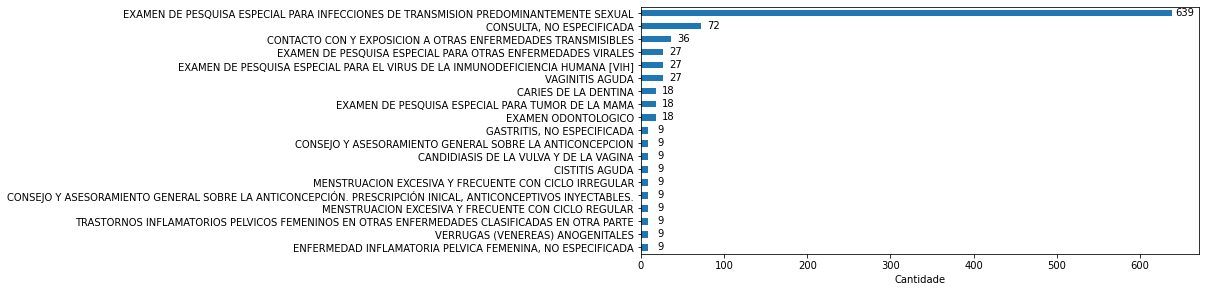

In [ ]:
#@title Trabajadores(as) Sexuales y enfermidades por CIE-10
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_ts.ATEMED_DES_CIE10.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(15+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')



In [ ]:
df_ts.ATEMED_DES_CIE10.value_counts(1)

EXAMEN DE PESQUISA ESPECIAL PARA INFECCIONES DE TRANSMISION PREDOMINANTEMENTE SEXUAL                          0.657407
CONSULTA, NO ESPECIFICADA                                                                                     0.074074
CONTACTO CON Y EXPOSICION A OTRAS ENFERMEDADES TRANSMISIBLES                                                  0.037037
EXAMEN DE PESQUISA ESPECIAL PARA OTRAS ENFERMEDADES VIRALES                                                   0.027778
EXAMEN DE PESQUISA ESPECIAL PARA EL VIRUS DE LA INMUNODEFICIENCIA HUMANA [VIH]                                0.027778
VAGINITIS AGUDA                                                                                               0.027778
EXAMEN DE PESQUISA ESPECIAL PARA TUMOR DE LA MAMA                                                             0.018519
EXAMEN ODONTOLOGICO                                                                                           0.018519
CARIES DE LA DENTINA                            

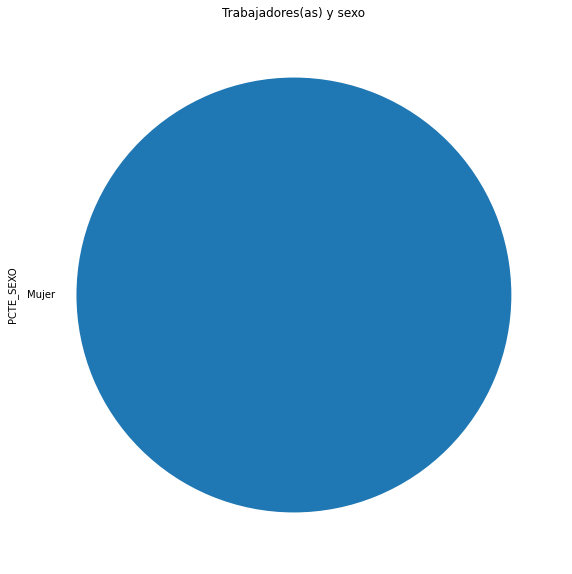

In [ ]:
#@title Trabajadores(as) Sexuales por sexo
plt.figure(figsize=(10,10))
rects1 = df_ts.PCTE_SEXO.value_counts().sort_values().plot(kind = 'pie')
#plt.title('Trabajadores(as) y sexo')
plt.show()

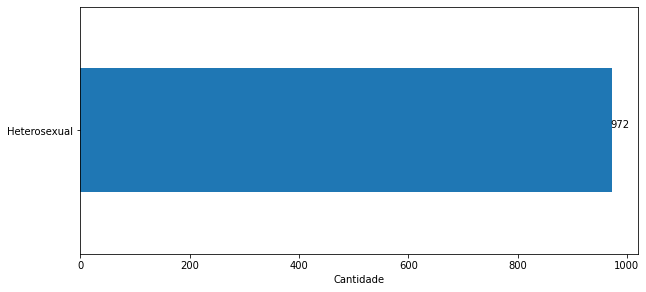

In [ ]:
#@title Trabajadores(as) sexuales por identidad de genero
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_ts.PCTE_ORI_SEX.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(15+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

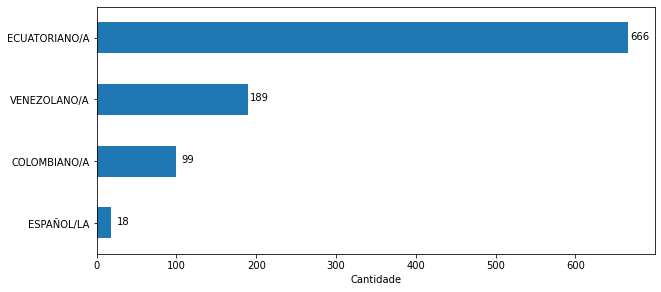

In [ ]:
#@title Trabajadores(as) sexuales por Nacionalidad
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_ts.PCTE_NACIONALIDAD.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(15+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

# 2. VIOLENCIA FÍSICA

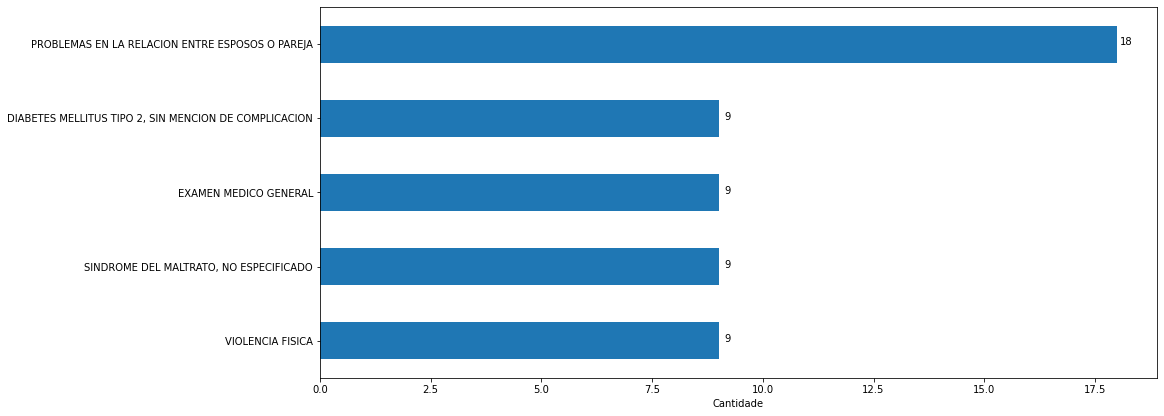

In [ ]:
#@title Violencia Física y enfermidades por CIE-10
plt.figure(figsize=(15,15))
plt.subplot(211)
rects1 = df_vf.ATEMED_DES_CIE10.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(0.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

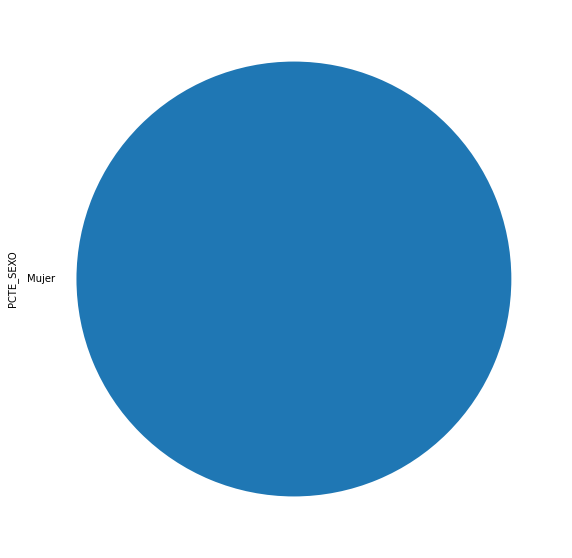

In [ ]:
#@title Violencia Física por sexo de los pacientes
plt.figure(figsize=(10,10))
rects1 = df_vf.PCTE_SEXO.value_counts().sort_values().plot(kind = 'pie')
#plt.title('Trabajadores(as) y sexo')
plt.show()

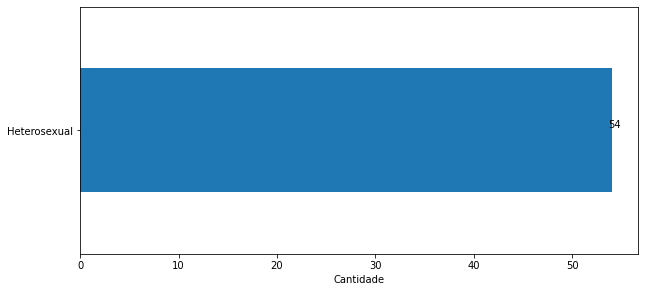

In [ ]:
#@title Violencia Física por identidad de genero
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_vf.PCTE_ORI_SEX.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

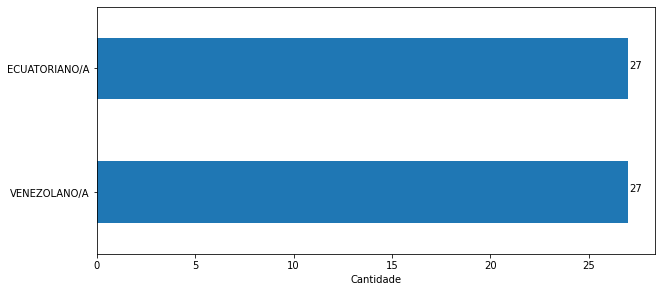

In [ ]:
#@title Violencia Física por Nacionalidad
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_vf.PCTE_NACIONALIDAD.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(0.4+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

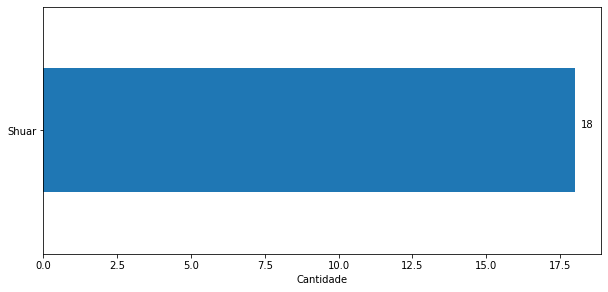

In [ ]:
#@title Violencia Física por Etnia
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_vf.PCTE_NAC_ETN.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(0.4+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

# 3. VIOLENCIA PSICOLOGICA

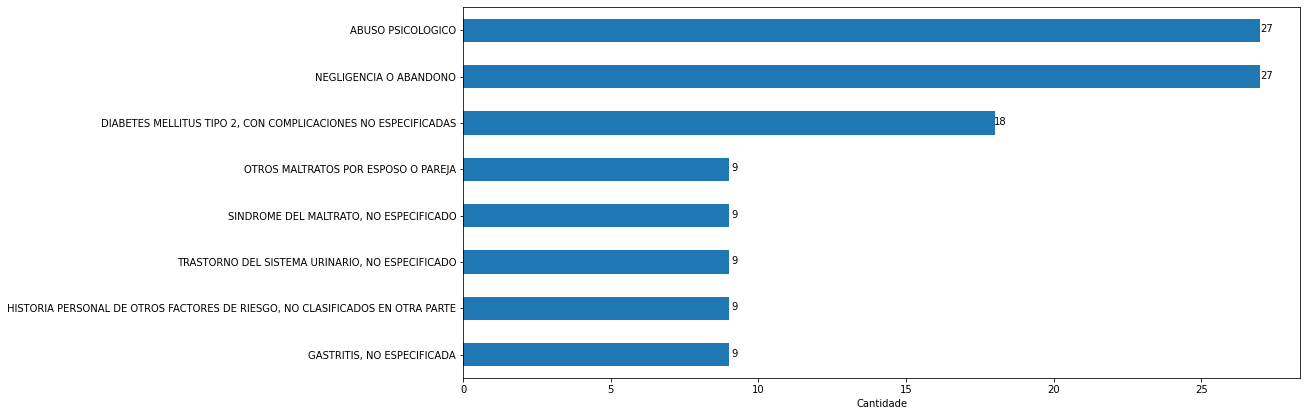

In [ ]:
#@title Violencia Psicologica y enfermidades por CIE-10
plt.figure(figsize=(15,15))
plt.subplot(211)
rects1 = df_vp.ATEMED_DES_CIE10.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(0.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

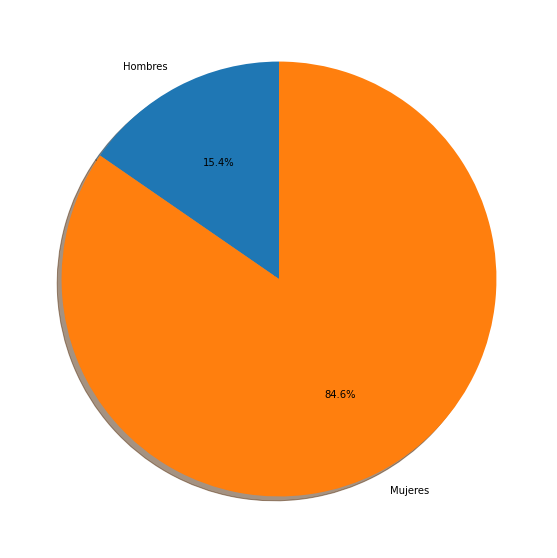

In [ ]:
#@title Violencia Psicologica por sexo de los pacientes
plt.figure(figsize=(10,10))
labels = 'Hombres', 'Mujeres'
rects1 = df_vp.PCTE_SEXO.value_counts().sort_values()
plt.pie(rects1, autopct='%1.1f%%',labels=labels,
        shadow=True, startangle=90)
#plt.title('Trabajadores(as) y sexo')
plt.show()

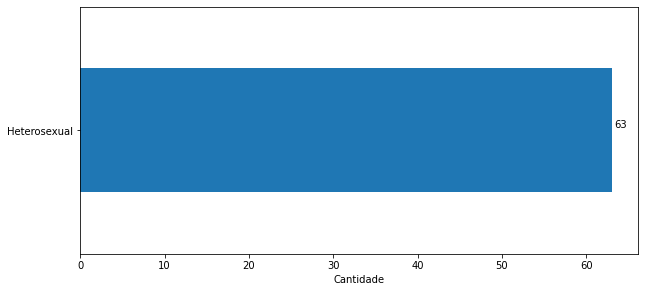

In [ ]:
#@title Violencia Psicologica por identidad de genero
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_vp.PCTE_ORI_SEX.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

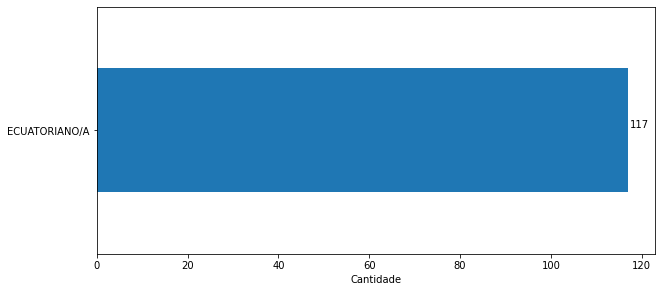

In [ ]:
#@title Violencia Psicologica por Nacionalidad
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_vp.PCTE_NACIONALIDAD.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(2.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

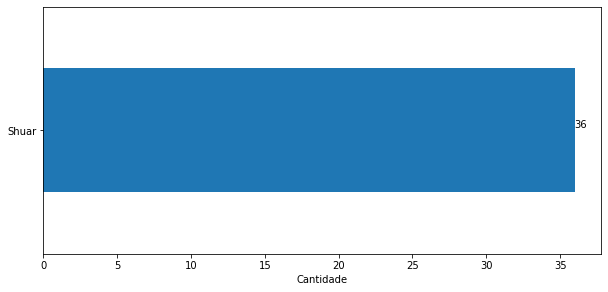

In [ ]:
#@title Violencia Psicologica por Etnia
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_vp.PCTE_NAC_ETN.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(0.4+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

# 4. VIOLENCIA SEXUAL

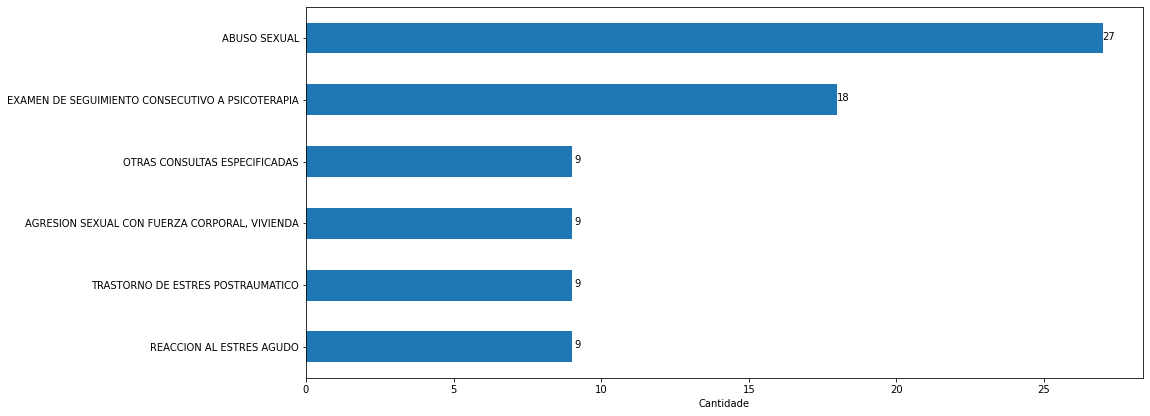

In [ ]:
#@title Violencia Sexual y enfermidades por CIE-10
plt.figure(figsize=(15,15))
plt.subplot(211)
rects1 = df_vs.ATEMED_DES_CIE10.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(0.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

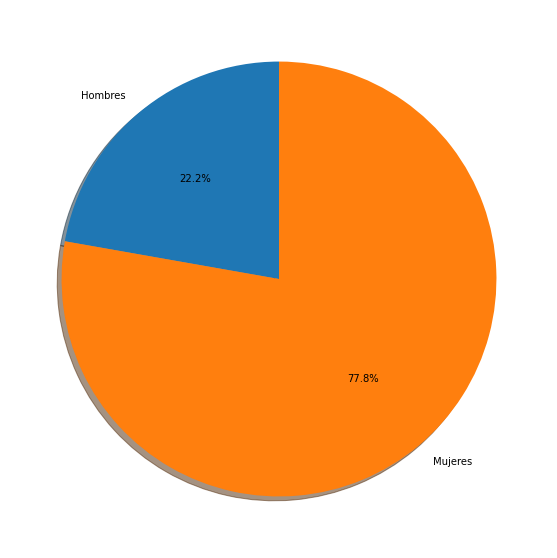

In [ ]:
#@title Violencia Sexo por sexo de los pacientes
plt.figure(figsize=(10,10))
labels = 'Hombres', 'Mujeres'
rects1 = df_vs.PCTE_SEXO.value_counts().sort_values()
plt.pie(rects1, autopct='%1.1f%%',labels=labels,
        shadow=True, startangle=90)
#plt.title('Trabajadores(as) y sexo')
plt.show()

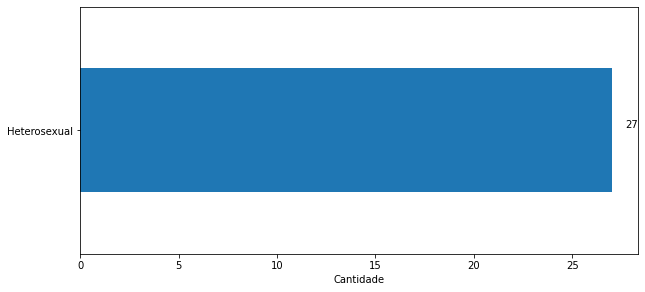

In [ ]:
#@title Violencia Sexual por orientacion sexual
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_vs.PCTE_ORI_SEX.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

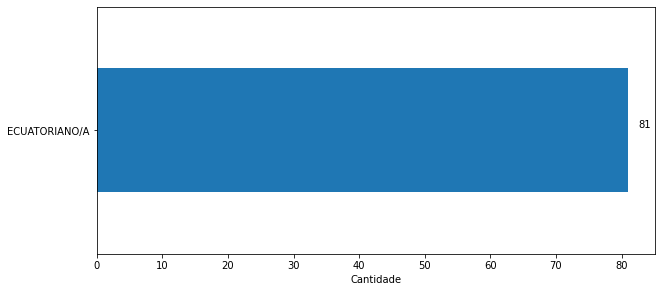

In [ ]:
#@title Violencia Sexual por Nacionalidad
plt.figure(figsize=(10,10))
plt.subplot(211)
rects1 = df_vs.PCTE_NACIONALIDAD.value_counts().sort_values().plot(kind = 'barh')
#plt.title('Trabajadores(as) y enfermidades por CIE-10')
plt.xlabel('Cantidade')
for p in rects1.patches:
    width = p.get_width()
    plt.text(2.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1}'.format(width),
             ha='center', va='center')

In [ ]:
#@title Violencia Sexual por Etnia
#@markdown No hay registros